# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [51]:
from numpy import array, linalg
import numpy as np

def linan():
    input1 = [float(x) for x in input().split()]
    input2 = [float(x) for x in input().split()]
    
    inv_A = linalg.inv(array([input1[:2:], input2[:2:]]))
    B = array([input1[-1], input2[-1]])
   
    X = inv_A.dot(B)
    print('{:.3f}'.format(X[0]), '{:.3f}'.format(X[1]))

if __name__ == '__main__':    
    linan()

1 2 3
4 5 9
1.000 1.000


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [53]:
def decorate_matrix(n):
    A = np.zeros((n,n), dtype=int)
    A[0,:] = np.ones(n)
    A[n-1,:] = np.ones(n)
    A[:,0] = np.ones(n)
    A[:,n-1] = np.ones(n)
    print(A)

if __name__ == '__main__':    
    n=int(input())
    decorate_matrix(n)

10
[[1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [54]:
'''
f(x) = (x + a)**2 - b = x**2 + 2*a*x + (a**2 - b)
f'(x) = 2*x + 2*a = 2(x + a)
Экстремум (минимум) у f будет в одной точке: x = -a 

Минимумы g - корни f
if b > 0:
    x1 = 0.5*(-2*a+(4*b)**0.5)
    x2 = 0.5*(-2*a-(4*b)**0.5)

или один минимум в той же точке, что и у f (f полностью над Ox)
'''
def find_f_and_g_minimum(a, b):
    if b > 0:
        return -a, [0.5 * (-2 * a + (4 * b)**0.5), 0.5 * (-2 * a - (4 * b)**0.5)]
    else:
        
        return -a, [-a]
    
# def find_function_minimum(func, x_min=-100, x_max=100):
#     Y = array(map(func, np.linspace(x_min,x_max)))
#     print(np.gradient(Y))
    
    
if __name__ == '__main__':          
    a, b = map(float, input().split())
    f = lambda x: (x + a)**2 - b

    g = lambda x: abs((x + a)**2 - b)
    fx, gx = find_f_and_g_minimum(a, b)
    print(fx, gx[0])
    

3 4
-3.0 -1.0


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

3 4


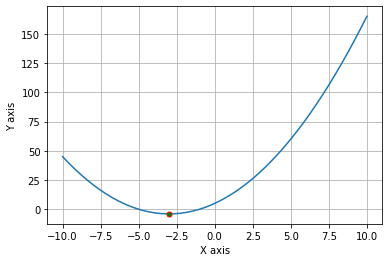

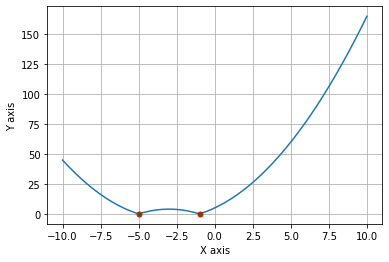

In [55]:
import matplotlib.pyplot as plt

def plot_function(func, x_min=-10, x_max=10):
    X = np.linspace(x_min, x_max)
    Y = list(map(func, X))
    
    plt.figure()
    plt.grid()
    plt.plot(X, Y)
    plt.ylabel("Y axis")
    plt.xlabel("X axis")
    
def plot_f_and_g_minimum(f, g, a, b, x_min=-10, x_max=10):
    fx, gx = find_f_and_g_minimum(a, b)
    fy, gy = f(fx), g(gx[0])
        
    fX = np.linspace(x_min, x_max)
    fY = list(map(f, fX))
    
    plt.figure()
    plt.grid()
    plt.plot(fX, fY)
    plt.plot(fx, fy, marker="o",markersize=5, markeredgecolor="red", markerfacecolor="green")
    plt.ylabel("Y axis")
    plt.xlabel("X axis")
    
    gX = np.linspace(x_min, x_max)
    gY = list(map(g, gX))
    
    plt.figure()
    plt.grid()
    plt.plot(gX, gY)
    for xi in gx:
        plt.plot(xi, gy, marker="o",markersize=5, markeredgecolor="red", markerfacecolor="green")
    plt.ylabel("Y axis")
    plt.xlabel("X axis")

if __name__ == '__main__':
    a, b = map(float, input().split())
    f = lambda x: (x + a)**2 - b
    g = lambda x: abs((x + a)**2 - b)
    plot_f_and_g_minimum(f, g, a, b)

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [59]:
from random import choice

'''
0.5**10 - вероятность выпадения 10 решек/орлов подряд у одного человека
0.5**10 + 0.5**10 = 0.5**9 - вероятность выпадения 10 орлов или 10 решек у одного человека
1 - 0.5**9 - вероятность НЕ выпадения 10 орлов или 10 решек у одного человека
(1 - 0.5**9)**1000 - НЕ выпало 10 орлов или 10 решек хотя бы у одного человека из 1000
Ответ: 1 - (1 - 0.5**9)**1000
'''
def task5_1():
    coin = (True, False) # head tail
    person = 0
    for _ in range(1000):
        head = 0
        tail = 0
        for i in range(10):
            if choice(coin):
                head += 1
            else:
                tail += 1
        if head ==10 or tail == 10:
            person += 1
    return person

def test_task5_1(times=1000):
    sum=0.0
    for _ in range(times):
        if task5_1()>1:
            sum+=1
    return sum/times

'''
Всего есть 6 способов выпасть 1 монете 8 раз подряд
0.5 * 6 = 3/512 - вероятность выпадения орла/решки 8 раз подряд у одного человека
1 - 3/512 = 509/512 - вероятность НЕ выпадения орла/решки 8 раз подряд у одного человека
(509/512)**1000 - НЕ выпало 8 орлов или 8 решек хотя бы у одного человека из 1000
Ответ: 1 - (509/512)**1000
'''
def task5_2():
    coin = (True, False) # head tail
    person = 0
    for _ in range(1000):
        head = 0
        tail = 0
        for i in range(8):
            if choice(coin):
                head += 1
            else:
                tail += 1
        if head ==8 or tail ==8:
            person += 1
    return person

def test_task5_2(times=1000):
    sum=0.0
    for _ in range(times):
        if task5_2()>1:
            sum+=1
    return sum/times
'''
Кол-во способов выбрать 3 человека из 1000 = 166167000
0.5**10 - вероятность выпадения 10 решек/орлов подряд у одного человека
0.5**10 * 0.5**10 * 0.5**10 * 166167000 = 0.5**30 * 166167000
Ответ: 0.5**30 * 166167000
'''
def test_task5_3(times=1000):
    sum=0.0
    for _ in range(times):
        if task5_1()==3:
            sum+=1
    return sum/times
        
            
if __name__ == '__main__':
    print('math task 5.1)', 1 - (1 - 0.5**9)**1000)
    print('math task 5.2)', 1 - (509/512)**1000)
    print('math task 5.3)', 0.5**30 * 166167000)
    
    print('task 5.1) {:.3f}'.format(test_task5_1()))
    print('task 5.2) {:.3f}'.format(test_task5_2()))
    print('task 5.3) {:.3f}'.format(test_task5_3()))


math task 5.1) 0.858440454732242
math task 5.2) 0.9971957200884372
math task 5.3) 0.15475507825613022
task 5.1) 0.582
task 5.2) 0.997
task 5.3) 0.177
